In [343]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt    # we will also use the matplotlib visualisation library
import warnings
warnings.simplefilter('ignore', category=UserWarning)  # suppresses warning message from Seaborn
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# command below ensures matplotlib output can be included in Notebook

%matplotlib inline

In [344]:
df = pd.read_csv("data/Player Per Game.csv") # load dataset into a dataframe

<Axes: >

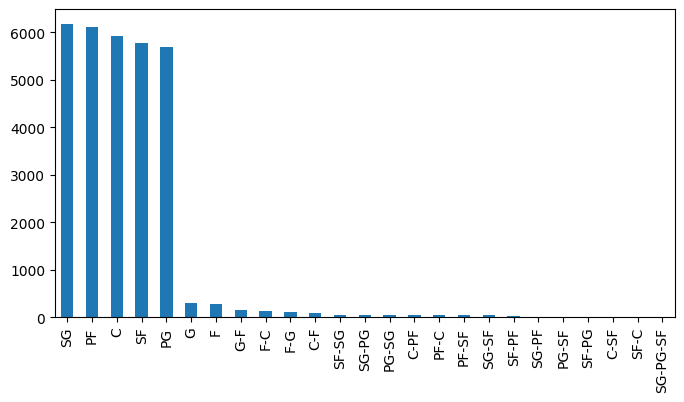

In [348]:
# look at all the different positions listed in the dataset
df['pos'].value_counts().plot.bar(figsize=(8, 4)) 

In [326]:
# # create new condensed position labels and the positions they include in dictionary
# new_positions_dict = {
#   "G": ["PG","SG"],
#   "F": ["F","SF","PF"],
#   "C": ["C"], 
#   "G-F": ["PG","SG","F","SF","PF"], 
#   "F-C": ["SF","PF","C"],
# }

# # interate through every row 
# for i in df.index:
#   pos = df.at[i, 'pos'].split('-')
#   for key, value in new_positions_dict.items():
#     # print(f"{value} {pos}")
#     if (np.all(np.in1d(pos, value))):
#       df.at[i, 'pos'] = key
#       break
print(len(df.columns))

28


## Scaling variables between 0 and 1

In [342]:
from sklearn.preprocessing import MinMaxScaler

X = df.copy()
X = X.drop(columns=['pos','player','season'])
column_names = X.columns
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X, columns=column_names)
X.describe()

,age,g,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,x2pa_per_game,x2p_percent,e_fg_percent,ft_per_game,fta_per_game,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
count,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000,1513.000000
mean,0.302545,0.462339,0.474776,0.313699,0.352219,0.354557,0.238699,0.276689,0.329113,0.261436,0.278898,0.413852,0.474525,0.166733,0.170015,0.660600,0.182062,0.262019,0.237516,0.200891,0.315582,0.142374,0.252292,0.428824,0.285346
std,0.174179,0.237521,0.270148,0.205360,0.211164,0.156120,0.167692,0.179746,0.102713,0.182363,0.185591,0.114759,0.125585,0.147613,0.140906,0.145584,0.158273,0.165366,0.160474,0.167741,0.169600,0.123508,0.176947,0.168441,0.192969
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.288462,0.235521,0.158879,0.188940,0.252119,0.113208,0.149606,0.309000,0.126214,0.141304,0.335463,0.394273,0.069307,0.077519,0.577259,0.080000,0.148148,0.120805,0.078261,0.190476,0.058824,0.130435,0.297297,0.137072
50%,0.291667,0.480769,0.471042,0.252336,0.294931,0.322034,0.207547,0.259843,0.348000,0.213592,0.233696,0.405751,0.464758,0.118812,0.131783,0.679300,0.140000,0.222222,0.201342,0.139130,0.285714,0.117647,0.195652,0.405405,0.227414
75%,0.416667,0.653846,0.706564,0.429907,0.474654,0.419492,0.339623,0.393701,0.384000,0.349515,0.380435,0.484026,0.546256,0.217822,0.217054,0.769679,0.240000,0.333333,0.308725,0.269565,0.428571,0.176471,0.326087,0.540541,0.389408
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [328]:
def kmeans(X, n_clusters):
    """
        Use KMeans to group the data into a specified number of clusters
        
        :param DataFrame X: scaled data to be clustered
        :param int n_clusters: number of clusters required
    """
    
    # Instantiate the model with a particular number of clusters and other parameters

    model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=200,
                   n_init=10, random_state=0)
    
    # fit the model ... i.e. find the n clusters
    
    model.fit(X)
    
    # Return key cluster information: score, centres and labels
    
    return (model.inertia_, model.cluster_centers_, model.labels_)

In [329]:
def gmm(X, n_clusters):
  """
      Use GMM to group the data into a specified number of clusters
      
      :param DataFrame X: scaled data to be clustered
      :param int n_clusters: number of clusters required
  """
  
  # Model the data with the specified number of multivariate Gaussians

  model = GaussianMixture(n_components=n_clusters, random_state=123,
                          n_init=10)
  
  # fit the model ... i.e. find n Gaussians that fit the data the best

  model.fit(X)

  # Use BIC score to evaluate fit ... could use aic() instead
  # or model.score(X) which gives score of each data row individually

  score = model.bic(X)
  
  # need to call predict(X) to determine which cluster that each point
  # is most likely to belong to

  labels = model.predict(X)

  return (score, model.means_, labels)

## Choosing number of clusters

In [330]:
kbest_scores = []
gmm_scores = []
for i in range(1, 11):
    score, centres, labels = kmeans(X, i)
    sizes = pd.Series(labels).value_counts().to_dict()
    print('KMeans has {} clusters with sizes {} with score {:.2f}'
          .format(i, sizes, score))
    kbest_scores.append(score)
    
    score, centres, labels = gmm(X, i)
    sizes = pd.Series(labels).value_counts().to_dict()
    print('GMM has {} clusters with sizes {} with score {:.2f}\n'
          .format(i, sizes, score))
    gmm_scores.append(score)

KMeans has 1 clusters with sizes {0: 1513} with score 1131.81
GMM has 1 clusters with sizes {0: 1513} with score -120847.02

KMeans has 2 clusters with sizes {1: 1016, 0: 497} with score 745.55
GMM has 2 clusters with sizes {1: 904, 0: 609} with score -127692.40

KMeans has 3 clusters with sizes {2: 658, 0: 575, 1: 280} with score 641.06
GMM has 3 clusters with sizes {1: 784, 0: 468, 2: 261} with score -132788.95

KMeans has 4 clusters with sizes {1: 568, 0: 458, 2: 261, 3: 226} with score 550.74
GMM has 4 clusters with sizes {1: 540, 3: 450, 2: 262, 0: 261} with score -133542.64

KMeans has 5 clusters with sizes {3: 494, 4: 452, 1: 240, 2: 220, 0: 107} with score 514.65
GMM has 5 clusters with sizes {2: 423, 1: 390, 4: 338, 3: 221, 0: 141} with score -133670.40

KMeans has 6 clusters with sizes {5: 439, 0: 407, 1: 231, 2: 206, 4: 123, 3: 107} with score 481.20
GMM has 6 clusters with sizes {3: 372, 4: 283, 0: 265, 2: 260, 5: 213, 1: 120} with score -132903.62

KMeans has 7 clusters wi

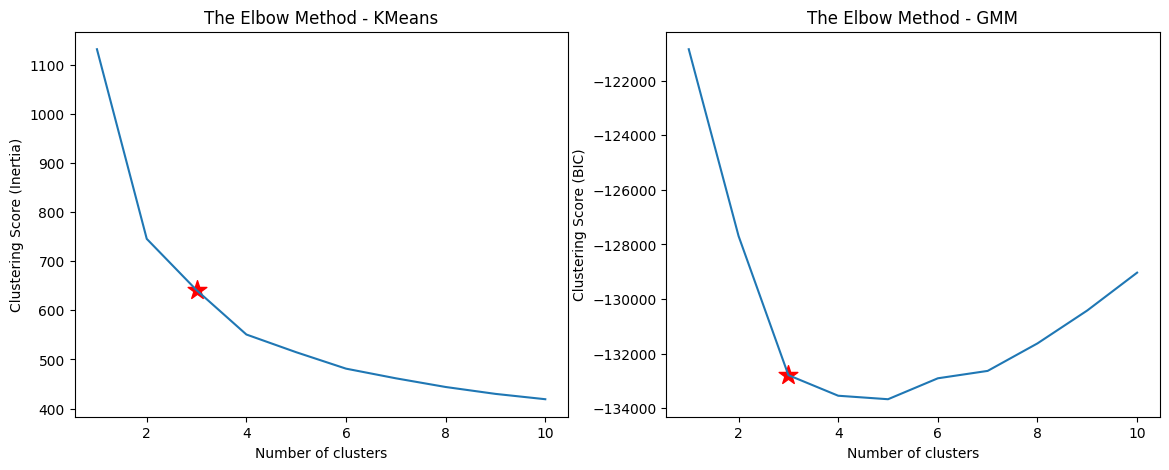

In [337]:
figure, axis = plt.subplots(1, 2, figsize=(14, 5))
axis[0].plot(range(1, 11), kbest_scores)
axis[0].scatter(3, kbest_scores[2], s = 200, c = 'red', marker='*')
axis[0].set_title('The Elbow Method - KMeans')
axis[0].set_xlabel('Number of clusters')
axis[0].set_ylabel('Clustering Score (Inertia)')
axis[1].plot(range(1, 11), gmm_scores)
axis[1].scatter(3, gmm_scores[2], s = 200, c = 'red', marker='*')
axis[1].set_title('The Elbow Method - GMM')
axis[1].set_xlabel('Number of clusters')
axis[1].set_ylabel('Clustering Score (BIC)')
plt.show()

In [332]:
positions = list(df['pos'])
def list_clusters(method, X, n_clusters, scaler, positions):
    
    score, centres, labels = method(X, n_clusters)
    
    sizes = pd.Series(labels).value_counts().to_dict()

    position_split = {}
    for i, label in enumerate(labels):
        position = positions[i]
        if label not in position_split:
            position_split[label] = {}
        if position not in position_split[label]:
            position_split[label][position] = 0
        position_split[label][position] += 1

    print('\nThere are {} clusters with a total score of {:.1f}\n'
          .format(len(sizes), score))

    # Re-scale the centres so that they have their original range and
    # put them in a dictionary to identify which variable they relate to
    # so that centres are meaningful

    for label, centre in enumerate(centres):
        centre = {X.columns[i]: 
                  round(centre[i] * scaler.data_range_[i] 
                        + scaler.data_min_[i], 2) for i in range(len(centre))}
        print('Cluster {} has {} players with positions {} and centre:\n{}\n'
              .format(label, sizes[label], position_split[label], centre))

    return

In [345]:
list_clusters(kmeans, X, 5, scaler, positions)


There are 5 clusters with a total score of 514.6

Cluster 0 has 107 players with positions {'PF': 20, 'C': 81, 'SF-SG': 1, 'SF': 1, 'PF-C': 1, 'SG': 1, 'PG': 2} and centre:
{'age': 25.58, 'g': 55.52, 'mp_per_game': 29.43, 'fg_per_game': 5.66, 'fga_per_game': 10.03, 'fg_percent': 0.57, 'x3p_per_game': 0.44, 'x3pa_per_game': 1.32, 'x3p_percent': 0.22, 'x2p_per_game': 5.22, 'x2pa_per_game': 8.7, 'x2p_percent': 0.6, 'e_fg_percent': 0.59, 'ft_per_game': 2.4, 'fta_per_game': 3.48, 'ft_percent': 0.69, 'orb_per_game': 2.83, 'drb_per_game': 6.71, 'trb_per_game': 9.53, 'ast_per_game': 2.39, 'stl_per_game': 0.82, 'blk_per_game': 1.21, 'tov_per_game': 1.76, 'pf_per_game': 2.71, 'pts_per_game': 14.16}

Cluster 1 has 240 players with positions {'SG': 56, 'PF': 40, 'PG': 83, 'SF': 41, 'C': 19, 'PG-SG': 1} and centre:
{'age': 26.56, 'g': 55.53, 'mp_per_game': 33.83, 'fg_per_game': 8.01, 'fga_per_game': 17.15, 'fg_percent': 0.47, 'x3p_per_game': 2.21, 'x3pa_per_game': 6.07, 'x3p_percent': 0.36, 'x2p_p